# Baseline data

## Import librairies & data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
import pylab 
from statistics import mode
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [2]:
data = pd.read_csv('haute_borne_data_2017_2020.csv', sep =';')

In [3]:
data.head()

,Wind_turbine_name,Date_time,Ba_avg,Ba_min,Ba_max,Ba_std,Rt_avg,Rt_min,Rt_max,Rt_std,...,Pas_max,Pas_std,Wa_c_avg,Wa_c_min,Wa_c_max,Wa_c_std,Na_c_avg,Na_c_min,Na_c_max,Na_c_std
0,R80721,2017-02-08T08:00:00+01:00,44.990002,44.990002,44.990002,0.0,14.0,14.0,14.0,0.0,...,NaN,NaN,358.04999,NaN,NaN,NaN,358.04999,NaN,NaN,NaN
1,R80721,2017-01-26T02:40:00+01:00,-1.000000,-1.000000,-1.000000,0.0,10.0,10.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R80721,2017-01-26T13:50:00+01:00,-1.000000,-1.000000,-1.000000,0.0,10.0,10.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,R80721,2017-01-26T15:00:00+01:00,-1.000000,-1.000000,-1.000000,0.0,10.0,10.0,10.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,R80721,2017-02-18T01:10:00+01:00,44.990002,44.990002,44.990002,0.0,17.0,17.0,17.0,0.0,...,NaN,NaN,7.99000,NaN,NaN,NaN,7.99000,NaN,NaN,NaN


In [4]:
data.shape

(217588, 138)

## Description des variables

In [5]:
description = pd.read_csv('data_description_turbine.csv', sep =';')
description

,Variable_name,Variable_long_name,Unit_long_name,Comment
0,Q,Reactive_power,kVAr,NaN
1,Ws,Wind_speed,m/s,Average wind speed
2,Va2,Vane_position_2,deg,Second wind vane on the nacelle
3,Git,Gearbox_inlet_temperature,deg_C,NaN
4,Ot,Outdoor_temperature,deg_C,NaN
5,Ws2,Wind_speed_2,m/s,Second anemometer on the nacelle
6,Nf,Grid_frequency,Hz,NaN
7,Nu,Grid_voltage,V,NaN
8,Dst,Generator_stator_temperature,deg_C,NaN
9,Wa_c,Absolute_wind_direction_corrected,deg,NaN


## Nettoyage rapide des valeurs nulles

In [6]:
df = data.copy()

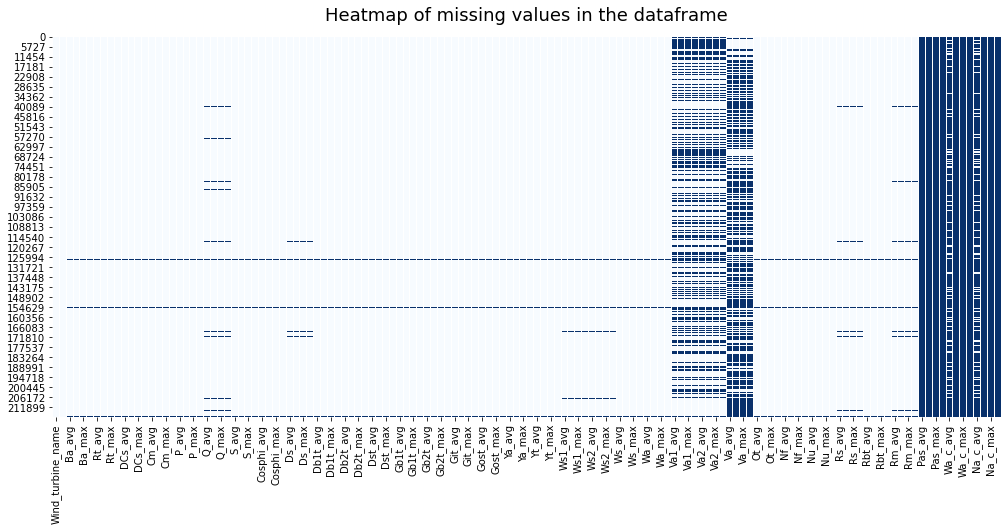

In [7]:
def show_map_missing_values(df):
    plt.figure(figsize=(17,7))
    heatmap = sns.heatmap(df.isna(), cbar=False, cmap="Blues")
    heatmap.set_title('Heatmap of missing values in the dataframe',
    fontdict={'fontsize':18}, pad=16);
    
show_map_missing_values(df)

=> suppression des colonnes nulles et des lignes dont les valeurs sont manquantes

In [8]:
# Visualisation des colonnes ayant plus de 80% de valeurs nulles 

df.isnull().sum().sort_values(ascending=False).head(15)*100/len(df) >= 80

Na_c_std     True
Wa_c_min     True
Na_c_max     True
Pas_min      True
Pas_max      True
Pas_std      True
Pas_avg      True
Wa_c_max     True
Wa_c_std     True
Na_c_min     True
Wa_c_avg     True
Na_c_avg     True
Va_avg      False
Va_min      False
Va_max      False
dtype: bool

In [9]:
# Drop les colonnes concernées par les valeurs nulles à 80% et un peu plus

df = df.drop(columns=['Na_c_std','Wa_c_min', 'Na_c_max', 'Pas_min', 'Pas_max', 'Pas_std', 'Pas_avg', 'Wa_c_max', 'Wa_c_std', 'Na_c_min', 'Wa_c_avg', 'Na_c_avg', 'Va_avg', 'Va_max', 'Va_min', 'Va_std'])

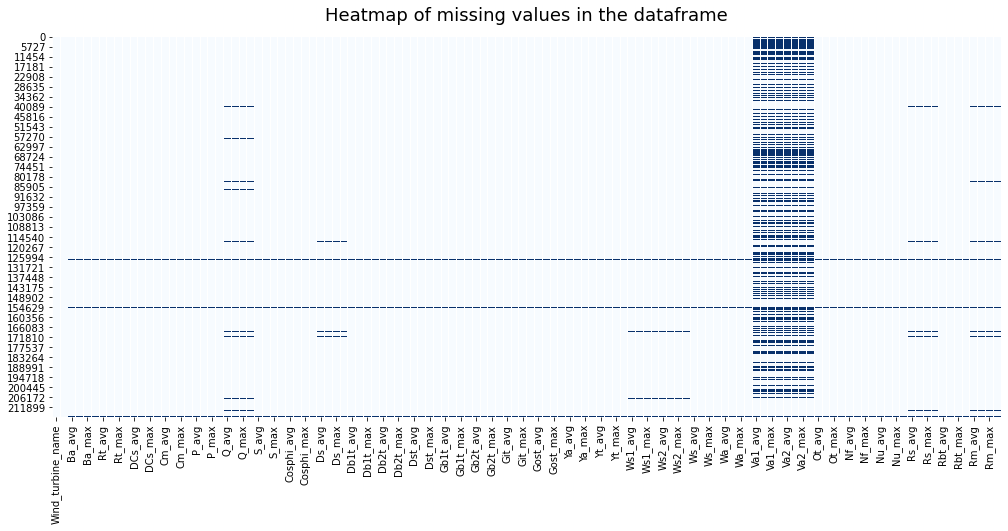

In [10]:
def show_map_missing_values(df):
    plt.figure(figsize=(17,7))
    heatmap = sns.heatmap(df.isna(), cbar=False, cmap="Blues")
    heatmap.set_title('Heatmap of missing values in the dataframe',
    fontdict={'fontsize':18}, pad=16);
    
show_map_missing_values(df)

In [11]:
df.shape

(217588, 122)

In [12]:
# Suppression des lignes nulles

df = df.dropna()

In [13]:
df.shape

(133503, 122)

## Features selection & split

In [14]:
# On prend toutes les variables sauf les colonnes avec des valeurs nulles et les 2 variables catégorielles
# Notre dataset n'est plus constitué que de m = 130 000

X = df.drop(columns = ['P_avg', 'Wind_turbine_name', 'Date_time'], axis=1)
y = df['P_avg']

In [15]:
# Split la donnée

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=5)

print('Train set :', X_train.shape)
print('Test set :', X_test.shape)

Train set : (106802, 119)
Test set : (26701, 119)


## Régression linéaire avec toutes les variables

### Entrainement du modèle

In [16]:
# Entraînement du modèle
# refacto : faire une fonction qui fait toutes les étapes - de la suppression des nulles au score R2 de stat model
# et entrainement du modèle avec cross et score
# Fit et score sur le X_train

X_train_constant = sm.add_constant(X_train)
model_lin_reg = sm.OLS(y_train, X_train_constant)
results = model_lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  P_avg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.292e+07
Date:                Tue, 22 Jun 2021   Prob (F-statistic):               0.00
Time:                        16:32:39   Log-Likelihood:            -1.9583e+05
No. Observations:              106802   AIC:                         3.919e+05
Df Residuals:                  106686   BIC:                         3.930e+05
Df Model:                         115                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.0179      0.496    -70.622      0.000     -35.990     -34.046
Ba_avg         0.2124      0.003     64.752      0.000       0.206       0.219
Ba_min        -0.1398      0.003    -44.463      0.000      -0.146      -0.134
Ba_max        -0.0738      0.003    -23.548      0.000      -0.080      -0.068
Ba_std        -0.1133      0.008    -13.538      0.000      -0.130      -0.097
Rt_avg        -0.0831      0.017     -4.950      0.000      -0.116      -0.050
Rt_min         0.0338      0.014      2.361      0.018       0.006       0.062
Rt_max         0.0572      0.021      2.740      0.006       0.016       0.098
Rt_std        -0.0181      0.058     -0.312      0.755      -0.132       0.096
DCs_avg       -0.0077      0.004     -1.792      0.073      -0.016       0.001
DCs_min       -0.0151      0.004     -4.043      0.000      -0.022      -0.008
DCs_max        0.0187      0.004      5.103      0.000       0.012       0.026
DCs_std       -0.0785      0.008    -10.349      0.000      -0.093      -0.064
Cm_avg         0.0047      0.000     26.791      0.000       0.004       0.005
Cm_min        -0.0061      0.000    -57.226      0.000      -0.006      -0.006
Cm_max         0.0005      0.000      2.707      0.007       0.000       0.001
Cm_std        -0.0038      0.000     -9.508      0.000      -0.005      -0.003
P_min          0.1338      0.001     93.961      0.000       0.131       0.137
P_max          0.2138      0.002    121.449      0.000       0.210       0.217
P_std         -0.4975      0.005    -94.946      0.000      -0.508      -0.487
Q_avg         -0.1052      0.001    -82.900      0.000      -0.108      -0.103
Q_min          0.0171      0.001     14.974      0.000       0.015       0.019
Q_max          0.0478      0.001     52.785      0.000       0.046       0.050
Q_std         -0.2001      0.003    -58.808      0.000      -0.207      -0.193
S_avg          0.9252      0.001   1730.244      0.000       0.924       0.926
S_min         -0.1021      0.001    -81.629      0.000      -0.105      -0.100
S_max         -0.1870      0.002   -113.520      0.000      -0.190      -0.184
S_std          0.4771      0.005     98.736      0.000       0.468       0.487
Cosphi_avg    34.4477      0.212    162.791      0.000      34.033      34.862
Cosphi_min     0.0036      0.009      0.411      0.681      -0.014       0.021
Cosphi_max     0.6769      0.095      7.152      0.000       0.491       0.862
Cosphi_std   -32.5327      0.426    -76.403      0.000     -33.367     -31.698
Ds_avg        -0.1337      0.008    -16.892      0.000      -0.149      -0.118
Ds_min         0.0122      0.004      2.857      0.004       0.004       0.021
Ds_max        -0.0201      0.004     -4.742      0.000      -0.028      -0.012
Ds_std         0.1409      0.010     13.752      0.000       0.121       0.161
Db

**Interprétation**

- R2 de 1 signifie clairement que nous avons un problème. Les hypothèses d'un tel score sont : multicolinéarité (formule du calcul de l'énergie de la turbine - d'ailleurs, nous avons un message d'erreur l'indiquant) ou overfitting. 
- Coefficient : nous constatons une certaine variabilité des coefficients. Il peut être intéressant de détecter celles qui ont d
- p-values : il ne faudra retenir que les p_value significatives (dont l'hypothèse nulle a été rejetée)
- skew négatif <-1 : cela signifie que nos données sont fortement biaisées !!vérifier

CONTINUER A ANALYSER LES INDICATEURS STAT MODEL
p2 : analyse des coefficients https://eric.univ-lyon2.fr/~ricco/cours/slides/Reg_Multiple_Colinearite_Selection_Variables.pdf et des pvalues

**Solutions**
- Vérifier l'overfitting avec la cross_val et le score sur le test
- Vérifier si les présupposés de la régression linéaire ont été respectés
- Réduire les features (matrice de corrélation / VIF / PCA) afin de vérifier le présupposé de la multicolinéarité

### Cross validation, score & overfitting

In [17]:
# Score model sur le X_train avec Sklearn

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9999888126923081

In [18]:
# En cross validation avec l'accuracy

cross_val_score(model, X_train, y_train, cv = 15)

array([0.99998865, 0.99999068, 0.99998907, 0.99998764, 0.99998855,
       0.99998815, 0.99998881, 0.99998837, 0.99998775, 0.99998983,
       0.99998783, 0.99998874, 0.99998854, 0.99998929, 0.99998898])

In [19]:
# En cross validation avec la Mean Squre Error
# Dans la mesure où nous n'avons pas supprimé les outliers, nous utilisons la MSE comme fonction_coût car
# la mise au carré des erreurs pondère plus fortement les valeurs abérrantes

cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv = 15)

array([-2.25812077, -1.98449956, -2.26502508, -2.50122274, -2.31922335,
       -2.4063055 , -2.35530725, -2.28087863, -2.50206864, -2.17703943,
       -2.47609981, -2.26407681, -2.38823159, -2.16680635, -2.25946303])

In [20]:
model.score(X_test, y_test)

0.9999881600956833

Nous avons utilisé la cross validation pour éviter l'overfitting (et récuser notre hypothèse) et scorer le modèle sur plusieurs échantillons. Le score en cross_val et sur le test est quasiment identique. Nous n'avons pas d'overfitting.

### Vérification des présupposés du modèle

Regardons du côté des pré-supposés de la régression linéaire (non colinéarité et distribution normale des résidus) dont le non-respect impliquerait que notre modèle n'est pas robuste. 

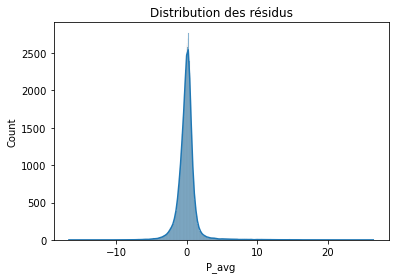

In [21]:
# Residual plot et distribution du X_train
# CHANGER L ECHELLE POUR UNE MEILLEURE VISIBILITE

y_hat = model.predict(X_train)
residuals = y_hat - y_train

sns.histplot(data=residuals, kde=True)
plt.title('Distribution des résidus')
plt.show()

In [22]:
residuals.describe()

count    1.068020e+05
mean    -1.854638e-14
std      1.513797e+00
min     -1.669516e+01
25%     -5.597787e-01
50%      7.369191e-03
75%      4.593189e-01
max      2.642472e+01
Name: P_avg, dtype: float64

In [23]:
print(f"Moyenne des résidus : {np.mean(residuals)}")
print(f"Médiane des résidus : {np.median(residuals)}")
print(f"Mode des résidus : {mode(residuals)}")

Moyenne des résidus : -1.854638155296219e-14
Médiane des résidus : 0.007369191005821563
Mode des résidus : 0.9812546689333459


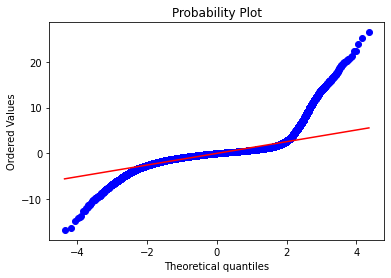

In [24]:
# QQ plot : permet de vérifier si la distribution suit une loi normale

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

Notre distribution n'est pas gaussienne. Ce présupposé de la régression linéaire n'est pas respecté. 

## Test avec la variable "Wind speed average" (Ws_avg)

Repartons d'un modèle plus simple en ne retenant qu'une seule feature pour voir comment se comporte notre modèle.

### Features selection & split

In [117]:
# Définition des features

X_2 = df[['Ws_avg']]
y_2 = df['P_avg']

In [118]:
# Split

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = 0.20, random_state = 5)

print('Train set : ', X_2_train.shape)
print('Test set :', X_2_test.shape)

Train set :  (106802, 1)
Test set : (26701, 1)


### Entrainement du modèle

In [119]:
# Entraînement du modèle avec statmodel

X_2_train_constant = sm.add_constant(X_2_train)
new_model_linreg = sm.OLS(y_2_train, X_2_train_constant)
resultats_2 = new_model_linreg.fit()
resultats_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  P_avg   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                 4.818e+05
Date:                Tue, 22 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:31:32   Log-Likelihood:            -7.1349e+05
No. Observations:              106802   AIC:                         1.427e+06
Df Residuals:                  106800   BIC:                         1.427e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -509.9923      1.392   -366.448      0.000    -512.720    -507.265
Ws_avg       157.2745      0.227    694.134      0.000     156.830     157.719
==============================================================================
Omnibus:                    15550.403   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           240218.246
Skew:                           0.102   Prob(JB):                         0.00
Kurtosis:                      10.344   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation**

On constate qu'avec la seule variable wind, notre R2 diminue mais il faudrait vérifier si notre modèle est plus robuste.

In [120]:
model = LinearRegression()
model.fit(X_2_train, y_2_train)
model.score(X_2_train, y_2_train)

0.8185593562861201

### Cross validation & score

In [121]:
# En cross validation avec l'accuracy
# FAIRE BOUCLE QUI PERMET DE VERIFIER A PARTIR DE COMBIEN DE CV NOTRE MODELE EST LE PLUS PROBANT

cross_val_score(model, X_2_train, y_2_train, cv = 15).mean()

0.8184215189527565

In [122]:
cross_val_score(model, X_2_train, y_2_train, scoring='neg_mean_squared_error', cv = 15).mean()

-37167.9973128273

In [123]:
model.score(X_2_test, y_2_test)

0.8246806550114052

### Vérification des présupposés du modèle

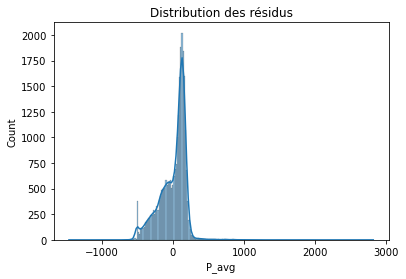

In [134]:
y_hat = model.predict(X_2_test)
residuals = y_hat - y_2_test

sns.histplot(data=residuals, kde=True)
plt.title('Distribution des résidus')
plt.show()

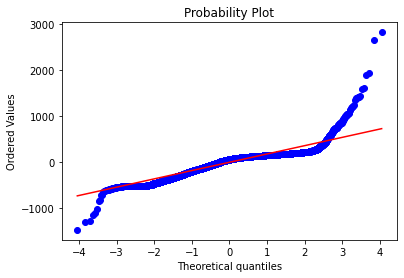

In [135]:
stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()

Nous constatons que notre distribution ne suit toujours pas une loi normale malgré que le présupposé de la multinolinéarité ait été écarté. Notre modèle a des difficultés à estimer l'énergie générée par l'éolienne lorsque les valeurs sont élevées ou basses, avec une plus grande difficulté pour les valeurs élevées (VERIFIER EXACTEMENT LA MESURE ?). Nous n'avons pas encore étudié ni géré les outliers. Il serait intéressant de voir quels sont-ils et ce que nous devons en faire (les supprimer, créer des classs, etc?).  

Tentons dans un premier temps de gérer la multicolinéarité des features et d'entrainer/optimiser plusieurs modèles

## Selection features grâce à VIF

L'indicateur VIF (Variance Inflation Factor) va nous permettre de checker les variables colinéaires entre elles et ainsi prévenir la colinéarité entre les features pré-sélectionnées.

### Sélection sommaire avec le heatmap

In [34]:
corr = df.corr()
print (corr['P_avg'].sort_values(ascending=False)[:30], '\n')

P_avg      1.000000
S_avg      0.999954
Rm_avg     0.995928
Cm_avg     0.993942
S_max      0.961374
P_max      0.961219
Rm_max     0.955826
Cm_max     0.955102
S_min      0.942943
P_min      0.940164
Cm_min     0.923291
Rm_min     0.921698
Ws_max     0.908641
Ws1_max    0.907777
Ws_avg     0.905426
Ws1_avg    0.904396
Ws2_max    0.903843
Ws2_avg    0.901692
Q_max      0.830156
S_std      0.804944
P_std      0.803368
Cm_std     0.793571
Q_avg      0.790875
Rm_std     0.784083
Ws_min     0.780492
Ws1_min    0.773852
Ws2_min    0.773524
Ws_std     0.738596
Ws1_std    0.737013
Rs_min     0.730674
Name: P_avg, dtype: float64 



In [35]:
# X.shape[1] = récupère les colonnes seulement
# variance_inflation_factor parameters : exog = all explanatory variables in narray / exog-idx = index of the exogenous variable in the columns of exog
# On sélectionne les features en fonction de la matrice de correlation - finalement cela ne nous aide pas, car
# elles sont très multicolinéaires => "ajustement manuel"

X = df[['Ws_avg', 'Cosphi_avg', 'Rm_avg', 'Rs_avg']]

vif = pd.DataFrame()
vif["Features"] = X.columns
vif["vif_factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [36]:
vif.round()

,Features,vif_factor
0,Ws_avg,56.0
1,Cosphi_avg,13.0
2,Rm_avg,12.0
3,Rs_avg,17.0


Nous n'avons pas de résultat en deça de 10 mais nous sélectionnons les features les moins colinéaires. 
D'ailleurs, si nous faisons un VIF avec juste 'Cosphi_avg', 'Rm_avg', 'Rs_avg', nous obtenons de la colinéarité inférieure à 10. 

*Cosinus phi* = power factor -  caractéristique d'un récepteur électrique qui rend compte de son efficacité pour consommer de la puissance lorsqu'il est traversé par un courant.  

*Rm_avg* = C'est une technologie exclusivement développée par Alstom et qui équipe l'ensemble de ses éoliennes. Elle protège la ligne de transmission des forces indésirables du vent en les redirigeant vers la tour. Le système PURE TORQUE® améliore la fiabilité et la durabilité de la turbine.

*Rs_avg* = rotor

### Selection features avec PCA

# Deuxième itération

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import make_pipeline
from sklearn import set_config 
set_config(display='diagram')

In [207]:
df_3 = data.copy()
#df_3.replace([np.inf, -np.inf], np.nan, inplace=True)

In [208]:
# On droppe les colonnes qui ont plus de 70% de valeurs nulles

def delet_features_having_more_then_50_per_cent_miss_values(data):
    return data[data.columns[data.isna().sum()/data.shape[0] <0.3]]

df_3 = delet_features_having_more_then_50_per_cent_miss_values(df_3)

## Définition des variables et split

In [221]:
# On détermine les features en fonction du VIF

X = df_3[['Ws_avg','Cosphi_avg', 'Rm_avg', 'Rs_avg']]
y = df_3['P_avg']

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

In [ ]:
# Transformer
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

# Estimator
model = SGDClassifier(random_state =0)
model.fit(X_train_transformed, y_train)

# Test
X_test_transformed = scaler.transform(X_test)
model.predict(X_test_transformed)

In [220]:
# Création du transformer Imputer

imputer = SimpleImputer(missing_values=np.nan, strategy="median")
X_train_transformed = imputer.fit_transformed(X_train)

array([[-1.82517489,  0.        , -0.53172048, -1.85969282],
       [-0.19230773, -0.999999  ,  0.0351112 , -0.0083022 ],
       [-0.12587413, -0.999999  , -0.01659975, -0.04649232],
       ...,
       [ 1.71678328, -1.        ,  2.17393634,  0.93316729],
       [ 1.42657348,  0.        ,  1.88542143,  0.93150685],
       [ 1.51398607,  0.        ,  1.94384036,  0.93150685]])

## Preprocessing (pipeline)

In [219]:
# On définit les variables numériques et catégorielles

categorical_features = X.select_dtypes(include=['object']).columns
#numerical_features = (list(X.select_dtypes(include=['float', 'integer']).columns.values))
numerical_features = list(X.columns.values)

AttributeError: 'numpy.ndarray' object has no attribute 'select_dtypes'

In [ ]:
# Mise en place pipeline pour chaque catégorie de variable
# Pas de NaN pour les valeurs catégorielles donc pas de SimpleImputer
# Remplacement des NaN valeurs nuémriques par la médiane car nous avons des outliers non gérés
# Robuscaler() : moins sensible aux valeurs extrêmes

pipe_categorical = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
pipe_numerical  = make_pipeline(SimpleImputer(missing_values=np.nan, strategy="median"))

In [ ]:
# On transforme les colonnes crées avec les pipeline de preprocessing
# (pipe_categorical,categorical_features)

preprocessing = make_column_transformer((pipe_numerical, numerical_features), 
                                        (pipe_categorical,categorical_features), remainder='passthrough')

preprocessing

In [ ]:
# Tester l'algo de détection des meilleurs modèles

In [214]:
from sklearn.linear_model import Ridge

red_reg = make_pipeline(preprocessing, Ridge())
red_reg.fit(X, y)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
# Essaie avec autre méthode de preprocessing

# categorical_transformer = Pipeline([
#     ('impute', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])
# categorical_transformer

In [159]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])
numeric_transformer

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scale', StandardScaler())])

In [160]:
preprocess_pipeline = ColumnTransformer([
    ('numeric_features', numeric_transformer, numerical_features),
    #('categorical_features', categorical_transformer, categorical_features),
    ])
preprocess_pipeline

ColumnTransformer(transformers=[('numeric_features',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scale', StandardScaler())]),
                                 ['Ws_avg', 'Cosphi_avg', 'Rm_avg', 'Rs_avg'])])

In [161]:
X_processed = preprocess_pipeline.fit_transform(X_3)

array([[-1.95966719,  0.24546531, -0.89709145, -1.8049172 ],
       [-0.21726929, -0.08100927, -0.235217  ,  0.16855262],
       [-0.1463794 , -0.08100927, -0.29559852,  0.12784427],
       ...,
       [ 1.81988124, -0.08100959,  2.26223287,  1.17210185],
       [ 1.51020451,  0.24546531,  1.92534159,  1.17033192],
       [ 1.60348063,  0.24546531,  1.99355584,  1.17033192]])

## Ridge regression

### Entraînement du modèle

In [60]:
X_3 = pd.DataFrame(X_processed, columns =['Ws_avg', 'Cosphi_avg', 'Rm_avg', 'Rs_avg'])

In [61]:
X_3.isnull().sum()

Ws_avg        0
Cosphi_avg    0
Rm_avg        0
Rs_avg        0
dtype: int64

In [51]:
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size = 0.2, random_state = 5)

In [105]:
from sklearn.linear_model import Ridge

red_reg = make_pipeline(preprocessing, Ridge(alpha=.5))
red_reg.fit(X_train, y_train)

TypeError: All estimators should implement fit and transform, or can be 'drop' or 'passthrough' specifiers. 'Ws_avg' (type <class 'str'>) doesn't.

In [ ]:
cv_r2 = cross_val_score(red_reg, X_3_train, y_3_train, cv = 10)
y_preds = red_reg.predict(X_3_test)

In [ ]:
def model_evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mae

In [ ]:
cv_r2 = np.mean(cv_r2)
print("Cross val score: " + str(cv_r2))
r2, mae = model_evaluate(y_3_test, y_preds)
print("R^2 score: " + str(r2))
print("Mean Absolute Erro: " + str(mae))

### Optimisation du modèle

In [ ]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=red_reg, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_3_train, y_3_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

# Troisième itération

## Data structure

### Target

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)

sns.histplot(data=data, x="P_avg", bins=120, kde=True)

La fréquence importance de valeurs à 0 en termes d'énergie produite indique que l'éolienne est à l'arrêt. 

Cela peut s'expliquer par plusieurs hypothèses, parmi lesquelles on distingue : 
- l'éolienne est en maintenance
- il n'y a pas assez ou trop de vent pour qu'elle puisse tourner (14kh/h < vitesse > 90 km/h) 
- vérifier le stockage

La distribution anormale de notre target ne pose pas particulièrement problème. Il faudra envisager de la logarithmer au besoin. 

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 4)

sns.histplot(data=data, x="Ws_avg", bins=120, kde=True)

Sommes nous en présence d'une polynomiale feature ? 

In [ ]:
# Cette feature est en mètre par seconde => à convertir pour que cela nous parle plus

data['Ws_avg'].describe()

In [ ]:
data['P_avg'].describe()

<AxesSubplot:xlabel='Ws_avg', ylabel='P_avg'>

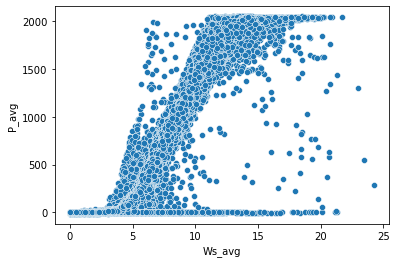

In [92]:
# Nous sommes en millisecondes

sns.scatterplot(data=data, x='Ws_avg', y='P_avg')

Sur l'intégralité du dataset (sans le nettoyage préalable), nous constatons qu'un bout de notre donnée a été retiré. 

<AxesSubplot:xlabel='Ws_avg', ylabel='P_avg'>

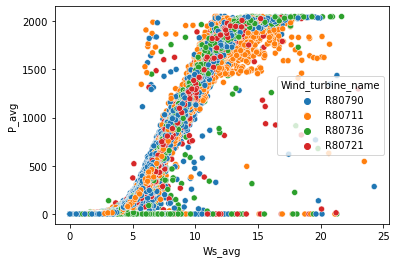

In [95]:
sns.scatterplot(data=df, x='Ws_avg', y='P_avg', hue='Wind_turbine_name')

Comprendre pourquoi quand j'ai du vent supérieur à 10, soit la puissance est au max, soit elle est au plus bas. 
Piste : obsolescence du matériel => essayer de comprendre les petits points intermédiaires. Faire avec une datetime pour comprendre ce phénomène. Problème de batterie. 

Note perso : vu que nous voulons généraliser notre modèle, il conviendrait peut-être de "supprimer" les valeurs qui seraient considérées comme aberrantes si la piste de l'obsolescence était retenue.

In [ ]:
sns.regplot(data=df, x='Ws_avg', y='P_avg')

Nous avons tout de même une corrélation positive.

# Feature engineering 

In [ ]:
# Conversion des de la feature vitesse qui est en mètres/secondes, en km/h. 

data["Speed km/h"] = data["Ws_avg"] / 1000
data["Speed km/h"] = data["Speed km/h"] * 3600